In [54]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5  # previous pdf hatch linewidth

In [55]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM2
CanESM2_ens = xr.open_dataset(path2+'CanESM2/pr_Amon_CanESM2_historical_ensmean_197601-200512_2.5_mes.nc')

#Abro CanESM5
CanESM5_ens = xr.open_dataset(path2+'CanESM5/pr_Amon_CanESM5_historical_ensmean1p1f1_2.5_mes.nc')

RuntimeError: Input/output error

In [4]:
#Datos-----------------------------------------------------------------
path = '/home/tabu/Escritorio/Doctorado/ClimDinam/TP2/'
path2 = '/media/tabu/JULIAexterno/climatologia_dinamica/'

#Abro CanESM2 horizonte 1
CanESM5_ens_h1 = xr.open_dataset(path2+'CanESM5/pr_Amon_CanESM5_ssp585_ensmeani1p1f1_2020-2049_2.5_mes.nc')

#Abro CanESM2 horizonte 2
CanESM5_ens_h2 = xr.open_dataset(path2+'CanESM5/pr_Amon_CanESM5_ssp585_ensmeani1p2f1_2070-2099_2.5_mes.nc')

In [6]:

#Monzón HS
def annual_range_HS(dato):
    verano = dato.sel(time=dato['time.season']=='DJF').mean(dim='time').pr
    invierno = dato.sel(time=dato['time.season']=='JJA').mean(dim='time').pr
    primavera = dato.sel(time=dato['time.season']=='SON').mean(dim='time').pr
    otono = dato.sel(time=dato['time.season']=='MAM').mean(dim='time').pr
    anual = verano + primavera + invierno + otono
    porcentaje_verano = verano/anual
    rango = (verano-invierno)*3
    return rango, porcentaje_verano

#Monzón HN
def annual_range_HN(dato):
    verano = dato.sel(time=dato['time.season']=='JJA').mean(dim='time').pr
    invierno = dato.sel(time=dato['time.season']=='DJF').mean(dim='time').pr
    primavera = dato.sel(time=dato['time.season']=='MAM').mean(dim='time').pr
    otono = dato.sel(time=dato['time.season']=='SON').mean(dim='time').pr
    anual = verano + primavera + invierno + otono
    porcentaje_verano = verano/anual
    rango = (verano-invierno)*3
    return rango, porcentaje_verano


Monzon range y mascara para historical y los dos horizontes

In [53]:
mon_range_CanESM5_HS, p_verano_HS = annual_range_HS(CanESM5_ens)
monzon_range_HS = (mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)/mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)) * p_verano_HS.where(p_verano_HS > .35)

mon_range_CanESM5_HN, p_verano_HN = annual_range_HN(CanESM5_ens)
monzon_range_HN = (mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)/mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)) * p_verano_HN.where(p_verano_HN > .35)

monzon_mask_HS = (mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)/mon_range_CanESM5_HS.where(mon_range_CanESM5_HS > 180)) * (p_verano_HS.where(p_verano_HS > .35)/p_verano_HS.where(p_verano_HS > .35))
monzon_mask_HN = (mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)/mon_range_CanESM5_HN.where(mon_range_CanESM5_HN > 180)) * (p_verano_HN.where(p_verano_HN > .35)/p_verano_HN.where(p_verano_HN > .35))

RuntimeError: NetCDF: HDF error

In [52]:
mon_range_CanESM5_HS_h1, p_verano_HS_h1 = annual_range_HS(CanESM5_ens_h1)
monzon_range_HS_h1 = (mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)/mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)) * p_verano_HS_h1.where(p_verano_HS_h1 > .35)

mon_range_CanESM5_HN_h1, p_verano_HN_h1 = annual_range_HN(CanESM5_ens_h1)
monzon_range_HN_h1 = (mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)/mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)) * p_verano_HN_h1.where(p_verano_HN_h1 > .35)

monzon_mask_HS_h1 = (mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)/mon_range_CanESM5_HS_h1.where(mon_range_CanESM5_HS_h1 > 180)) * (p_verano_HS_h1.where(p_verano_HS_h1 > .35)/p_verano_HS_h1.where(p_verano_HS_h1 > .35))
monzon_mask_HN_h1 = (mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)/mon_range_CanESM5_HN_h1.where(mon_range_CanESM5_HN_h1 > 180)) * (p_verano_HN_h1.where(p_verano_HN_h1 > .35)/p_verano_HN_h1.where(p_verano_HN_h1 > .35))

RuntimeError: NetCDF: HDF error

In [50]:
mon_range_CanESM5_HS_h2, p_verano_HS_h2 = annual_range_HS(CanESM5_ens_h2)
monzon_range_HS_h2 = (mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)/mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)) * p_verano_HS_h2.where(p_verano_HS_h2 > .35)

mon_range_CanESM5_HN_h2, p_verano_HN_h2 = annual_range_HN(CanESM5_ens_h2)
monzon_range_HN_h2 = (mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)/mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)) * p_verano_HN_h2.where(p_verano_HN_h2 > .35)

monzon_mask_HS_h2 = (mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)/mon_range_CanESM5_HS_h2.where(mon_range_CanESM5_HS_h2 > 180)) * (p_verano_HS_h2.where(p_verano_HS_h2 > .35)/p_verano_HS_h2.where(p_verano_HS_h2 > .35))
monzon_mask_HN_h2 = (mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)/mon_range_CanESM5_HN_h2.where(mon_range_CanESM5_HN_h2 > 180)) * (p_verano_HN_h2.where(p_verano_HN_h2 > .35)/p_verano_HN_h2.where(p_verano_HN_h2 > .35))

RuntimeError: NetCDF: HDF error

In [45]:


def mapa(dato1,dato2,titulo):
    #America del sur -------Observaciones-----------------------------------------
    fig = plt.figure(figsize=(10, 18),dpi=300,constrained_layout=True)
    fig_size = plt.rcParams["figure.figsize"]
    data_crs = ccrs.PlateCarree(central_longitude=0)
    projection = ccrs.PlateCarree()
    ax1 = plt.subplot(1,1,1,projection=projection)
    #ax1.set_extent([275,335, 10, -60], crs=data_crs)
    clevels = np.arange(0,12,2)
    levels1 = [dato1.min(),0,dato1.max()]
    ax1.contourf(cyclic_lons, lat, dato1,levels1, transform=data_crs,levels=levels1, hatches=["", "..."], alpha=0.01)
    levels2 = [dato2.min(),0,dato2.max()]
    ax1.contourf(cyclic_lons, lat, dato2,levels2, transform=data_crs,levels=levels2, hatches=["", "..."], alpha=.01)
    ax1.add_feature(cartopy.feature.COASTLINE)
    ax1.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
    ax1.gridlines(crs=data_crs, linewidth=0.3, linestyle='-')
    #Saco las coordenadas de la figura hasta ahora
    plt0_ax = plt.gca()
    left, bottom1, width, height = plt0_ax.get_position().bounds
    first_plot_left = plt0_ax.get_position().bounds[0]
    #Utilizo las coordenadas para definir la posición de la colorbar 1
    #colorbar_axes = fig.add_axes([first_plot_left + .9, bottom1, 0.02, 1.2*height])
    fig_size[0] = width*4 + 10
    fig_size[1] = height*2 + 3
    plt.rcParams["figure.figsize"] = fig_size
    fig.suptitle(str(titulo), y=0.68, x=0.5,fontsize=20)
    return fig


In [47]:
lon = np.arange(0, 362, 362/144)
lat = CanESM2_ens.lat
cyclic_cambio_HS, cyclic_lons = add_cyclic_point(monzon_mask_HS_h2*p_verano_HS_h2, coord=lon)
cyclic_cambio_HN, cyclic_lons = add_cyclic_point(monzon_mask_HN_h2*p_verano_HN_h2, coord=lon)


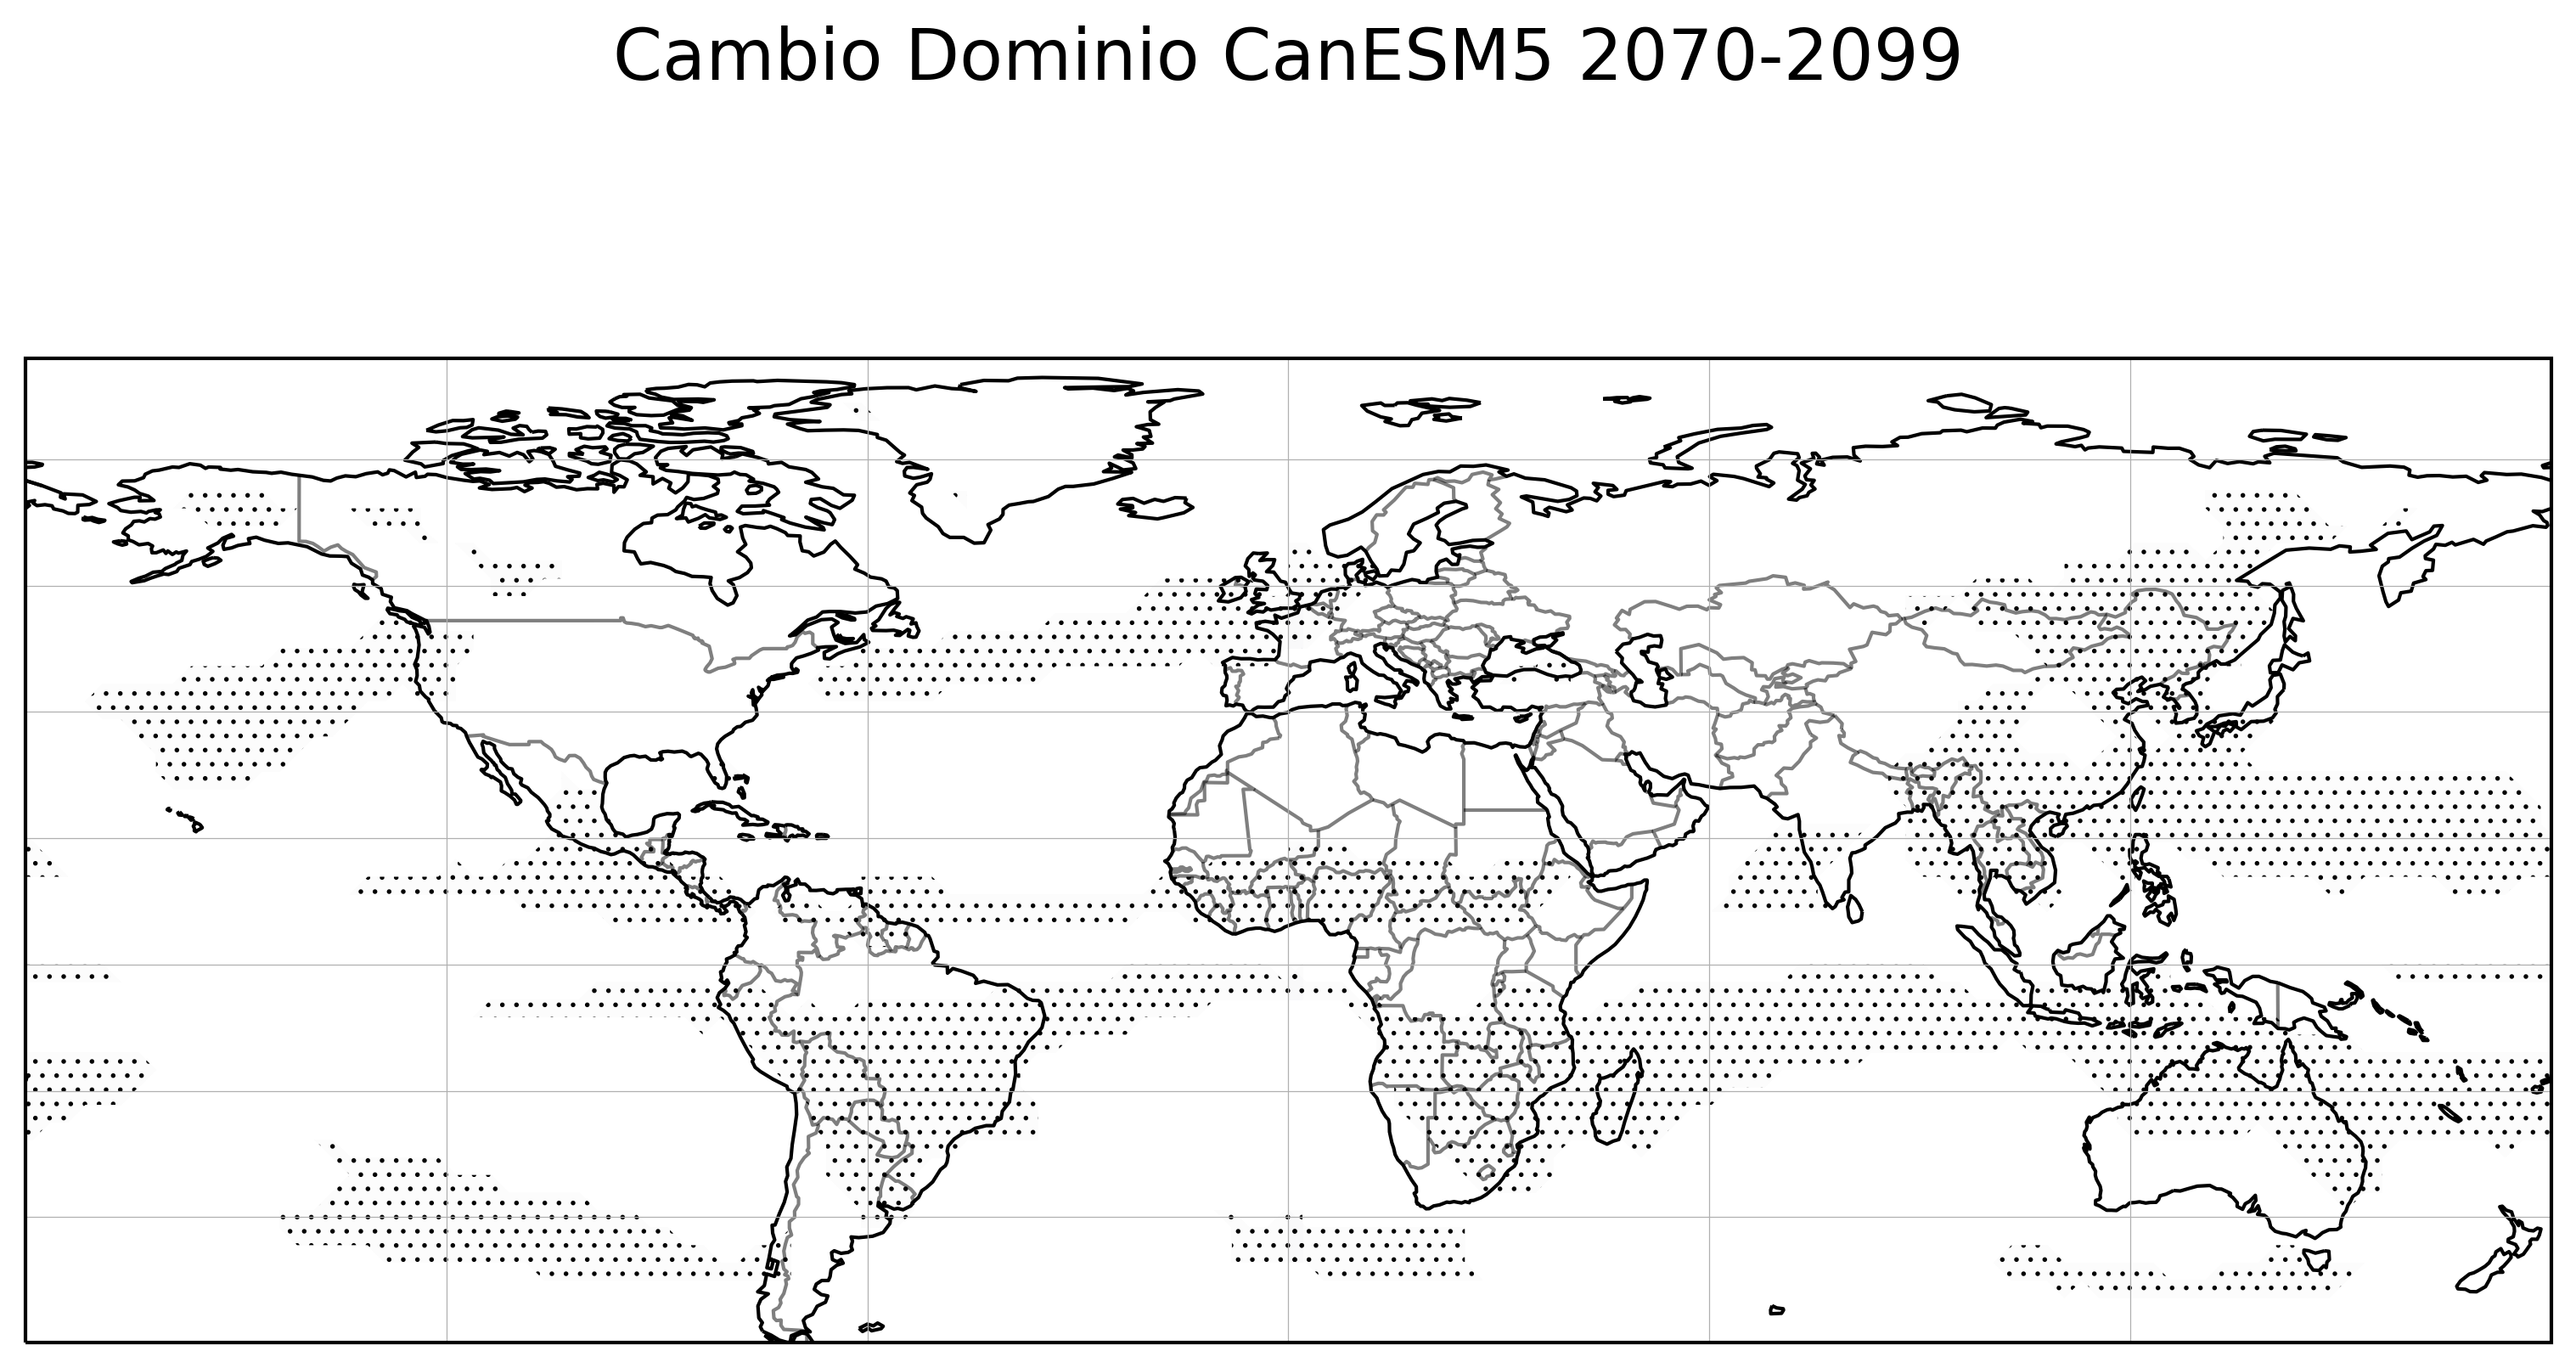

In [48]:
titulo = 'Cambio Dominio CanESM5 2070-2099'
clevels = np.arange(0,5,10)
figura = mapa(cyclic_cambio_HS,cyclic_cambio_HN,titulo)